<a href="https://colab.research.google.com/github/dorin133/Machine-Learning-236756-all-HW/blob/master/HW1_236756.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Data Exploration and Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from pandas.core.frame import DataFrame
from sklearn.model_selection import train_test_split

## Part 1: Loading the dataset and first looking

In [ ]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [ ]:
dataset = pd.read_csv('virus_data.csv', sep=',', header=0)
#for our usage


In [ ]:
#Print number of rows and columns of our data set, for Q1
dataset.shape

In [ ]:
#Used for Q2, print the value counts of number of siblings feature.
dataset.num_of_siblings.value_counts(dropna=False)

2.0    754
1.0    707
3.0    554
0.0    400
4.0    272
NaN    154
5.0    120
6.0     29
7.0      7
8.0      2
9.0      1
Name: num_of_siblings, dtype: int64

## **Part 2 - Data Imputation and cleaning**

In [ ]:
#Import the split method, and split the data. random_state=1+2=3 (from our ID numbers)
#Code for Q5
from sklearn.model_selection import train_test_split
data_training_set, data_test_set = train_test_split(dataset, test_size=0.2, train_size=0.8, random_state=3)

In [ ]:
#make the variable 'symptoms' an OHE vector for Q7
temp = data_training_set.symptoms.str.get_dummies(sep =';')
temp["num_of_symptoms"]=temp.sum(axis=1)
data_training_set_override = pd.concat([temp, data_training_set], axis=1, join="inner")

In [ ]:
#make the categorial variable 'sex' an OHE vector for Q8
temp = pd.get_dummies(data_training_set_override.sex)
data_training_set_override = pd.concat([temp, data_training_set_override], axis=1, join="inner")
data_training_set_override = data_training_set_override.drop('sex', 1)

In [ ]:
#extract state from the address
data_training_set_override['state'] = data_training_set_override['address'].str.split(' ').str[-2]

In [ ]:
#two new cols for X,Y coordinates
data_training_set_override['X'] = data_training_set_override['current_location'].str.split(',').str[0]
data_training_set_override['Y'] = data_training_set_override['current_location'].str.split(',').str[1]
data_training_set_override.X = data_training_set_override.X.str.slice(start=2, stop=-1, step=1)
data_training_set_override.Y = data_training_set_override.Y.str.slice(start=2, stop=-2, step=1)
data_training_set_override['X'] =data_training_set_override['X'].astype(float)
data_training_set_override['Y'] =data_training_set_override['Y'].astype(float)

In [ ]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return round(earth_radius * 2 * np.arcsin(np.sqrt(a)))

In [ ]:
#create a new col for the feature 'infected_in_radius'
data_training_set_override['infected_in_radius'] = 0

In [ ]:
#calculate the amount of infected people in the radius of a person.
#This code takes 4 minutes, do this only if you have to, or before submission!
radius = 100
for i in range(data_training_set_override.shape[0]): 
    if math.isnan(data_training_set_override.X.values[i]) or math.isnan(data_training_set_override.Y.values[i]) :
      continue
    #if data_training_set_override.covid.values[i]==True :
      #continue
    count = 0
    for j in range(data_training_set_override.shape[0]):
      if (i!=j) and (not(math.isnan(data_training_set_override.X.values[j])) and not(math.isnan(data_training_set_override.Y.values[j]))):
        if data_training_set_override.covid.values[j]==True :
          if haversine(data_training_set_override.X.values[i], data_training_set_override.Y.values[i], data_training_set_override.X.values[j], data_training_set_override.Y.values[j]) <= radius :
            count+= 1
    data_training_set_override.infected_in_radius.values[i] = count

In [ ]:
#drop irrelevant features from the overriden datatset
data_training_set_override = data_training_set_override.drop('symptoms', 1)
data_training_set_override = data_training_set_override.drop('address', 1)
data_training_set_override = data_training_set_override.drop('current_location', 1)
data_training_set_override = data_training_set_override.drop('job', 1)

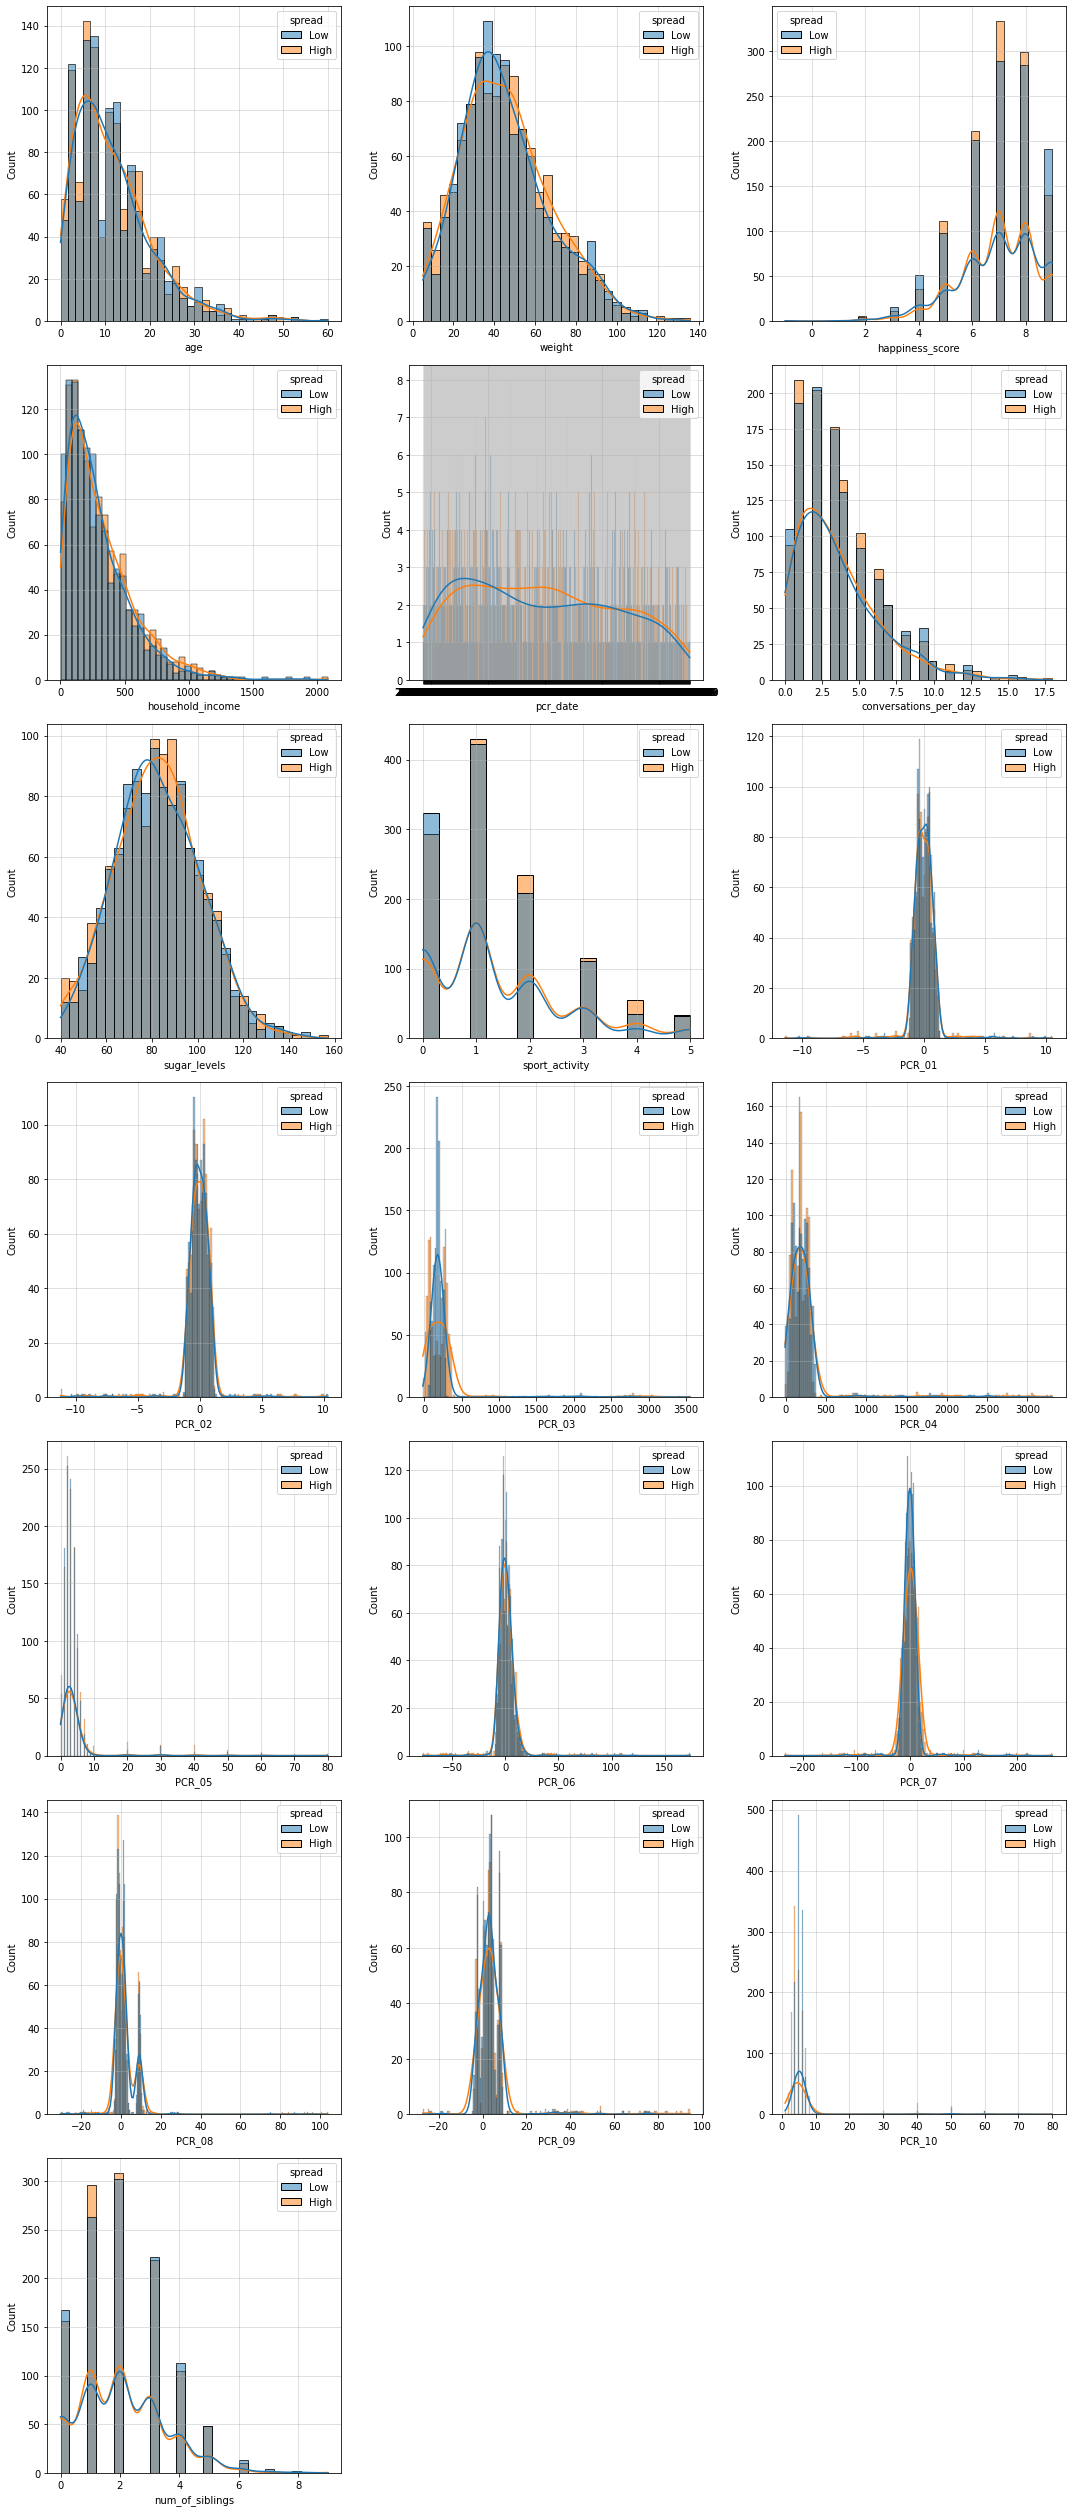

In [ ]:
#for all COL_NAME features, print an histogram for spread, risk, covid (boolean values) + kde=True
COL_NAME = ['age', 'weight','happiness_score','household_income','pcr_date','conversations_per_day','sugar_levels','sport_activity','PCR_01','PCR_02','PCR_03','PCR_04','PCR_05','PCR_06','PCR_07','PCR_08','PCR_09','PCR_10', 'num_of_siblings']
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=data_training_set_override, x=column, kde=True, hue=data_training_set_override.spread)
 plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for all COL_NAME features, print an histogram for spread, risk, covid (boolean values) + kde=True
COL_NAME = ['age', 'weight','happiness_score','household_income','pcr_date','conversations_per_day','sugar_levels','sport_activity','PCR_01','PCR_02','PCR_03','PCR_04','PCR_05','PCR_06','PCR_07','PCR_08','PCR_09','PCR_10', 'num_of_siblings']
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=data_training_set_override, x=column, kde=True, hue=data_training_set_override.risk)
 plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for all COL_NAME features, print an histogram for spread, risk, covid (boolean values) + kde=True
COL_NAME = ['age', 'weight','happiness_score','household_income','pcr_date','conversations_per_day','sugar_levels','sport_activity','PCR_01','PCR_02','PCR_03','PCR_04','PCR_05','PCR_06','PCR_07','PCR_08','PCR_09','PCR_10', 'num_of_siblings']
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=data_training_set_override, x=column, kde=True, hue=data_training_set_override.covid)
 plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for all COL_NAME features, print an histogram for spread, risk, covid (boolean values) + + kde=False
COL_NAME = ['patient_id', 'blood_type', 'sex']
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=data_training_set, x=column, kde=False, hue=data_training_set.spread)
 plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for all COL_NAME features, print an histogram for spread, risk, covid (boolean values) + kde=False
COL_NAME = ['patient_id', 'blood_type', 'sex']
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=data_training_set, x=column, kde=False, hue=data_training_set.risk)
 plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for all COL_NAME features, print an histogram for spread, risk, covid (boolean values) + kde=False
COL_NAME = ['patient_id', 'blood_type', 'sex']
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=data_training_set, x=column, kde=False, hue=data_training_set.covid)
 plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for all COL_NAME newwwww features, print an histogram for spread, risk, covid (boolean values) + kde=True
COL_NAME = ['X', 'Y', 'num_of_symptoms', 'infected_in_radius']
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=data_training_set_override, x=column, kde=True, hue=data_training_set_override.spread)
 plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for all COL_NAME newwwww features, print an histogram for spread, risk, covid (boolean values) + kde=True
COL_NAME = ['X', 'Y', 'num_of_symptoms', 'infected_in_radius']
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=data_training_set_override, x=column, kde=True, hue=data_training_set_override.risk)
 plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for all COL_NAME newwwww features, print an histogram for spread, risk, covid (boolean values) + kde=True
COL_NAME = ['X', 'Y', 'num_of_symptoms', 'infected_in_radius']
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=data_training_set_override, x=column, kde=True, hue=data_training_set_override.covid)
 plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for all COL_NAME newwwww features, print an histogram for spread, risk, covid (boolean values) + kde=False
COL_NAME = ['X', 'Y', 'num_of_symptoms', 'infected_in_radius']
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=data_training_set_override, x=column, kde=False, hue=data_training_set_override.spread)
 plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for all COL_NAME newwwww features, print an histogram for spread, risk, covid (boolean values) + kde=False
COL_NAME = ['state', 'cough', 'fever', 'headache', 'low_appetite', 'shortness_of_breath']
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=data_training_set_override, x=column, kde=False, hue=data_training_set_override.spread)
 plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for all COL_NAME newwwww features, print an histogram for spread, risk, covid (boolean values) + kde=False
COL_NAME = ['state', 'cough', 'fever', 'headache', 'low_appetite', 'shortness_of_breath']
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=data_training_set_override, x=column, kde=False, hue=data_training_set_override.risk)
 plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for all COL_NAME newwwww features, print an histogram for spread, risk, covid (boolean values) + kde=False
COL_NAME = ['state', 'cough', 'fever', 'headache', 'low_appetite', 'shortness_of_breath']
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=data_training_set_override, x=column, kde=False, hue=data_training_set_override.covid)
 plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for sugar_levels feature, print an histogram for spread, risk, covid (boolean values) + kde=False - for the report!!!!
COLS = 3
ROWS = int(np.ceil(1 / COLS))
plt.figure(figsize=(15, 5 * ROWS))
plt.subplot(ROWS,COLS,1)
sns.histplot(data=data_training_set_override, x='sugar_levels', kde=True, hue=data_training_set_override.risk)
plt.grid(alpha=0.5)
plt.subplot(ROWS,COLS,2)
sns.histplot(data=data_training_set_override, x='sugar_levels', kde=True, hue=data_training_set_override.spread)
plt.grid(alpha=0.5)
plt.subplot(ROWS,COLS,3)
sns.histplot(data=data_training_set_override, x='sugar_levels', kde=True, hue=data_training_set_override.covid)
plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#Histogram for Q10, of weight to find outliers
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.histplot(data=data_training_set, x='weight', kde=True, hue=data_training_set.sex)
plt.grid(alpha=0.5)

In [ ]:
#Box-Plot for Q11, of household_income by risk,  before treating outliers.
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.grid()
_ = plt.title("Box plot of household_income by risk")
#Forming the Box-Plot
sns.boxplot(data=data_training_set_override, x='household_income', y="risk")
plt.show()

In [ ]:
#Finding limits for later Capping method of 'household_income'

percentile25 = data_training_set_override['household_income'].quantile(0.25)
percentile75 = data_training_set_override['household_income'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
#lower_limit = percentile25 - 1.5 * iqr

data_training_set_override[data_training_set_override['household_income'] > upper_limit]
#The actual Capping part
data_training_set_override['household_income'] = np.where(data_training_set_override['household_income'] > upper_limit, upper_limit, data_training_set_override['household_income'])
    

In [ ]:
#Box-Plot for Q11, of household_income by risk, after treating outliers
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
#Forming the Box-Plot
plt.grid()
sns.boxplot(data=data_training_set_override, x='household_income', y="risk")
plt.show()

In [ ]:
#Box-Plot for Q12 of PCR_07 alone.
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.grid()
_ = plt.title("Box plot of PCR_07 before before outliers")
#Forming the Box-Plot
sns.boxplot(data=data_training_set_override, x='PCR_07')
plt.show()

In [ ]:
#Box-Plot for weight and age before treating outliers for Q12
plt.figure(figsize=(44,12))
plt.subplot(1,2,1)
plt.grid()
_ = plt.title("Box plot of age by weight before treating outliers")
#Forming the Box-Plot
sns.boxplot(data=data_training_set_override, x='age', y="weight")
plt.show()

In [ ]:
#Box-Plot for weight and sugar levels before treating outliers for Q12,  not for report
plt.figure(figsize=(44,12))
plt.subplot(1,2,1)
#Forming the Box-Plot
sns.boxplot(data=data_training_set_override, x='weight', y="sugar_levels")
plt.show()

In [ ]:
#hypothesis for usage in practice: X=age, Y=weight
#Function to clean contextual outliers.
def outlier_Y_by_X(train_set,X,Y):
  x_range = train_set[X].unique()
  for x in x_range:
    Q3=train_set[train_set[X]==x][Y].quantile(0.75)
    Q1=train_set[train_set[X]==x][Y].quantile(0.25)
    max=((Q3-Q1)*1.5+Q3) 
    min=(Q1-(Q3-Q1)*1.5)
    train_set[Y][(train_set[X]==x) & (train_set[Y]>max)] = max
    train_set[Y][(train_set[X]==x) & (train_set[Y]<min)] = min

In [ ]:
#Cleaning the contextual outliers
outlier_Y_by_X(data_training_set_override, 'age', 'weight')
outlier_Y_by_X(data_training_set_override, 'weight', 'sugar_levels')

In [ ]:
#Box-Plot for weight and age after treating outliers. for report
plt.figure(figsize=(44,12))
plt.subplot(1,2,1)
plt.grid()
_ = plt.title("Box plot of age by weight after treating outliers")
#Forming the Box-Plot
sns.boxplot(data=data_training_set_override, x='age', y="weight")
plt.show()

In [ ]:
#Q12: weight and sugar_levels golbal outliers cleaning- meaning to cleaned in relation to themselves
 
COL_NAME_3 = ["weight", "sugar_levels"]

for columnName in COL_NAME_3:
  percentile25 = data_training_set_override[columnName].quantile(0.25)
  percentile75 = data_training_set_override[columnName].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  #The actual Capping part
  data_training_set_override[columnName] = np.where(data_training_set_override[columnName] > upper_limit, upper_limit, np.where(data_training_set_override[columnName] < lower_limit,lower_limit, data_training_set_override[columnName]))


In [ ]:
#Finding limits for later Capping method - Q13
#We figured out there are few "bad" days with a lot of outliers in PCR tests. We decided first to clean by those days.

#COL_NAME_2 = ["PCR_01", "PCR_02", "PCR_03", "PCR_04", "PCR_05", "PCR_06", "PCR_07","PCR_08", "PCR_09", "PCR_10"]
df_PCR = data_training_set_override[["patient_id","pcr_date","PCR_01", "PCR_02", "PCR_03", "PCR_04", "PCR_05", "PCR_06", "PCR_07","PCR_08", "PCR_09", "PCR_10"]]
df_PCR_outliers= df_PCR.copy()
#create the fisrt outliers' table for PCR_01

percentile25 = df_PCR['PCR_01'].quantile(0.25)
percentile75 = df_PCR['PCR_01'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df_PCR_outliers = df_PCR[(df_PCR['PCR_01']>upper_limit) | (df_PCR['PCR_01'] <lower_limit)]

#do the others in loop for finding outliers from at least one PCR test
for (columnName, columnData) in df_PCR.iteritems():
  if (columnName == 'pcr_date' or columnName == 'patient_id'):
    continue
  df_PCR_temp = df_PCR.copy()
  percentile25 = columnData.quantile(0.25)
  percentile75 = columnData.quantile(0.75)
  iqr = percentile75 - percentile25

  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  
  #The actual Capping part
  df_PCR_temp = df_PCR[(df_PCR[columnName]>upper_limit) | (df_PCR[columnName] <lower_limit)]
  
  df_PCR_outliers = pd.concat([df_PCR_outliers,df_PCR_temp]).drop_duplicates().reset_index(drop=True)

In [ ]:
#extract a dataset of subjects with normal PCR tests 
df_PCR_normal= df_PCR.copy()
df_PCR_normal = df_PCR[~df_PCR['patient_id'].isin(df_PCR_outliers['patient_id'])]
outliers_counts = df_PCR_outliers.pcr_date.value_counts()
normal_counts = df_PCR_normal.pcr_date.value_counts()
normal_counts.rename("normal_pcr", inplace=True)
outliers_counts.rename("outliers_pcr", inplace=True)
result = pd.concat([outliers_counts, normal_counts], axis=1, join= "outer")
result['normal_pcr'] = result['normal_pcr'].fillna(0)
result['outliers_pcr'] = result['outliers_pcr'].fillna(0)
result['ratio'] = result['outliers_pcr']/(result['outliers_pcr']+result['normal_pcr'])
result['date'] = result.index

In [ ]:
#iterate the result table, find bad_ratio dates, and put Nan in the corresponding PCR_xx for these dates in data_training_set_override
#later on, in imputation, we'll fill them back with other values
bad_ratio = 0.7
for index, row in result.iterrows() :
  if (row['ratio']> bad_ratio) :
    data_training_set_override['PCR_01'] = np.where(data_training_set_override['pcr_date'] == row.date, np.NaN , data_training_set_override['PCR_01'])
    data_training_set_override['PCR_02'] = np.where(data_training_set_override['pcr_date'] == row.date, np.NaN , data_training_set_override['PCR_02'])
    data_training_set_override['PCR_03'] = np.where(data_training_set_override['pcr_date'] == row.date, np.NaN , data_training_set_override['PCR_03'])
    data_training_set_override['PCR_04'] = np.where(data_training_set_override['pcr_date'] == row.date, np.NaN , data_training_set_override['PCR_04'])
    data_training_set_override['PCR_05'] = np.where(data_training_set_override['pcr_date'] == row.date, np.NaN , data_training_set_override['PCR_05'])
    data_training_set_override['PCR_06'] = np.where(data_training_set_override['pcr_date'] == row.date, np.NaN , data_training_set_override['PCR_06'])
    data_training_set_override['PCR_07'] = np.where(data_training_set_override['pcr_date'] == row.date, np.NaN , data_training_set_override['PCR_07'])
    data_training_set_override['PCR_08'] = np.where(data_training_set_override['pcr_date'] == row.date, np.NaN , data_training_set_override['PCR_08'])
    data_training_set_override['PCR_09'] = np.where(data_training_set_override['pcr_date'] == row.date, np.NaN , data_training_set_override['PCR_09'])
    data_training_set_override['PCR_10'] = np.where(data_training_set_override['pcr_date'] == row.date, np.NaN , data_training_set_override['PCR_10'])


In [ ]:
#Q12 all features (PCR_XX !!) to cleaned in relation to themselves, after dealing with outliers by "bad" days.
 
COL_NAME_4 = ["PCR_01", "PCR_02", "PCR_03", "PCR_04", "PCR_05", "PCR_06", "PCR_07","PCR_08", "PCR_09", "PCR_10"]
for columnName in COL_NAME_4:
  percentile25 = data_training_set_override[columnName].quantile(0.25)
  percentile75 = data_training_set_override[columnName].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  #The actual Capping part
  data_training_set_override[columnName] = np.where(data_training_set_override[columnName] > upper_limit, upper_limit, np.where(data_training_set_override[columnName] < lower_limit,lower_limit, data_training_set_override[columnName]))


In [ ]:
#Box-Plot for Q12 of PCR_07 alone after treating outliers.
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.grid()
_ = plt.title("Box plot of PCR_07 before after outliers")
#Forming the Box-Plot
sns.boxplot(data=data_training_set_override, x='PCR_07')
plt.show()

In [ ]:
#Printing histograms for Q17 of "sex" and "weight" before impuation.
#for weight feature, print an histogram for spread, risk, covid (boolean values) + kde=true - for the report!!!!
COLS = 3
ROWS = int(np.ceil(1 / COLS))
plt.figure(figsize=(15, 5 * ROWS))
plt.subplot(ROWS,COLS,1)
sns.histplot(data=data_training_set_override, x='weight', kde=True, hue=data_training_set_override.risk)
plt.grid(alpha=0.5)
plt.subplot(ROWS,COLS,2)
sns.histplot(data=data_training_set_override, x='weight', kde=True, hue=data_training_set_override.spread)
plt.grid(alpha=0.5)
plt.subplot(ROWS,COLS,3)
sns.histplot(data=data_training_set_override, x='weight', kde=True, hue=data_training_set_override.covid)
plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for sex feature, print an histogram for spread, risk, covid (boolean values) + kde=true - for the report!!!!
COLS = 3
ROWS = int(np.ceil(1 / COLS))
plt.figure(figsize=(15, 5 * ROWS))
plt.subplot(ROWS,COLS,1)
sns.histplot(data=data_training_set, x='sex', kde=False, hue=data_training_set.risk)
plt.grid(alpha=0.5)
plt.subplot(ROWS,COLS,2)
sns.histplot(data=data_training_set, x='sex', kde=False, hue=data_training_set.spread)
plt.grid(alpha=0.5)
plt.subplot(ROWS,COLS,3)
sns.histplot(data=data_training_set, x='sex', kde=False, hue=data_training_set.covid)
plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#Random sample imputation function for missing values, using RSI method.
def RSI(df,variable):
  df[variable+'_random'] = df[variable]#Copy feature into new feature
  #calculate random sample and store into random_sample_values
  random_sample_value = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  #in random_sample_value all filled nan values are present now we want to put/merge this all filled values in our dataset
  # for this we want to match all nan values index in random_sample_values with df[variavle_'random] 
  #Pandas need to have same index in order to merge dataset
  random_sample_value.index = df[df[variable].isnull()].index #find index of NaN values in feature
  #now put a condition where ever it is null with loc function then replace with random_sample_values
  df.loc[df[variable].isnull(),variable+'_random'] =random_sample_value

  #copy from imputed column to original column, and remove imputed added column
  df[variable] = df[variable+'_random']
  df = df.drop(variable+'_random', 1, inplace = True)

In [ ]:
#Imputation on num_of_siblings feature for Q16, using Random sample imputation
RSI(data_training_set, 'num_of_siblings')

In [ ]:
#Imputation using Random sample imputation (RSI) on none ordinal/continues features for Q17
RSI(data_training_set, 'sex')
RSI(data_training_set, 'blood_type')
RSI(data_training_set_override, 'age')
RSI(data_training_set_override, 'state')
RSI(data_training_set_override, 'sport_activity')
RSI(data_training_set_override, 'happiness_score')
RSI(data_training_set_override, 'pcr_date')
#RSI(data_training_set, 'symptoms')
RSI(data_training_set_override, 'conversations_per_day')
RSI(data_training_set_override, 'X')
RSI(data_training_set_override, 'Y')

In [ ]:
# make the categorial variable 'blood_type' an OHE vector for Q6 (better now than never) 
# to first impute all blood types to make the zero for each column the meaning of not having this blood type 
temp = pd.get_dummies(data_training_set.blood_type)
data_training_set_override = pd.concat([temp, data_training_set], axis=1, join="inner")
data_training_set_override = data_training_set_override.drop('blood_type', 1)

In [ ]:
#Mean/median imputation function
def MMI(df,variable):
  
  df[variable+'_median'] = df[variable]#Copy feature into new feature
  #calculate random sample and store into random_sample_values
  median_value = round(df[variable].dropna().median(), 6)
  df[variable+'_median'] = df[variable].fillna(median_value)

  #copy from imputed column to original column, and remove imputed added column
  df[variable] = df[variable+'_median']
  df = df.drop(variable+'_median', 1, inplace = True)


In [ ]:
#Imputation on MMI (Mean Median imputation) features for Q17
MMI(data_training_set_override, 'weight')
MMI(data_training_set_override, 'household_income')
MMI(data_training_set_override, 'sugar_levels')
MMI(data_training_set_override, 'PCR_01')
MMI(data_training_set_override, 'PCR_02')
MMI(data_training_set_override, 'PCR_03')
MMI(data_training_set_override, 'PCR_04')
MMI(data_training_set_override, 'PCR_05')
MMI(data_training_set_override, 'PCR_06')
MMI(data_training_set_override, 'PCR_07')
MMI(data_training_set_override, 'PCR_08')
MMI(data_training_set_override, 'PCR_09')
MMI(data_training_set_override, 'PCR_10')

In [ ]:
#Printing histograms for Q17 of "sex" and "weight" after impuation.

#for weight feature, print an histogram for spread, risk, covid (boolean values) + kde=true - for the report!!!!
COLS = 3
ROWS = int(np.ceil(1 / COLS))
plt.figure(figsize=(15, 5 * ROWS))
plt.subplot(ROWS,COLS,1)
sns.histplot(data=data_training_set_override, x='weight', kde=True, hue=data_training_set_override.risk)
plt.grid(alpha=0.5)
plt.subplot(ROWS,COLS,2)
sns.histplot(data=data_training_set_override, x='weight', kde=True, hue=data_training_set_override.spread)
plt.grid(alpha=0.5)
plt.subplot(ROWS,COLS,3)
sns.histplot(data=data_training_set_override, x='weight', kde=True, hue=data_training_set_override.covid)
plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#for sex feature, print an histogram for spread, risk, covid (boolean values) + kde=true - for the report!!!!
COLS = 3
ROWS = int(np.ceil(1 / COLS))
plt.figure(figsize=(15, 5 * ROWS))
plt.subplot(ROWS,COLS,1)
sns.histplot(data=data_training_set, x='sex', kde=False, hue=data_training_set.risk)
plt.grid(alpha=0.5)
plt.subplot(ROWS,COLS,2)
sns.histplot(data=data_training_set, x='sex', kde=False, hue=data_training_set.spread)
plt.grid(alpha=0.5)
plt.subplot(ROWS,COLS,3)
sns.histplot(data=data_training_set, x='sex', kde=False, hue=data_training_set.covid)
plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
#Builing OHE Vectores back again after imputation, for features like symptoms, sex, etc...
##blood_type feature
###Drop old OHE vector:
data_training_set_override = data_training_set_override.drop(['A+','A-','B+','B-','AB+','AB-','O+','O-'], axis=1)
temp1 = pd.get_dummies(data_training_set.blood_type)
data_training_set_override = pd.concat([temp1, data_training_set_override], axis=1, join="inner")
##sex feature
###Drop old OHE vector:
data_training_set_override = data_training_set_override.drop(['F','M'], axis=1)
temp2 = pd.get_dummies(data_training_set.sex)
data_training_set_override = pd.concat([temp2, data_training_set_override], axis=1, join="inner")


## **Part3  - Feature selection**

In [ ]:
#calculating correlation beside the matrix for our usage
data_training_set_override.corr()

In [ ]:
f = plt.figure(figsize=(20, 12))
data_for_matrix = data_training_set_override
data_for_matrix = data_for_matrix.drop(['infected_in_radius'], inplace=False, axis=1)
data_for_matrix = data_for_matrix.drop(data_for_matrix.iloc[:, 0:17], inplace=False, axis=1)
plt.matshow(data_for_matrix.select_dtypes(np.number).corr(), fignum=f.number)
plt.xticks(range(data_for_matrix.select_dtypes(np.number).shape[1]), data_for_matrix.select_dtypes(np.number).columns, fontsize=14, rotation=270)
plt.yticks(range(data_for_matrix.select_dtypes(np.number).shape[1]), data_for_matrix.select_dtypes(np.number).columns, fontsize=14)
cb = plt.colorbar()
_ = plt.title('Correlation Matrix', fontsize=24, pad = 120);


In [ ]:
#JointPlot of PCR_01 and PCR_02 for Q21:

g = sns.jointplot(data = data_training_set_override,  x='PCR_01', y='PCR_02',  hue='risk')
_ = g.ax_joint.grid()

In [ ]:
#Here we used pairplot to explore more connection between different features.
# Used mainly for our purpose and not for report.
sns.pairplot(
    data_training_set_override,
    x_vars=["PCR_01", "PCR_02", "PCR_03", "PCR_04", "PCR_05", "PCR_06","PCR_07","PCR_08","PCR_09","PCR_10",],
    y_vars=["PCR_01", "PCR_02", "PCR_03", "PCR_04", "PCR_05", "PCR_06","PCR_07","PCR_08","PCR_09","PCR_10",],
    hue = 'spread',
    palette = ['red', 'blue']
)

## Part 4: Data Preperation Pipeline

In [ ]:
def MinMaxNorm(copy_dataset, dataset_train, colName):
  scaler2 = MinMaxScaler()
  scaler2.fit(pd.DataFrame(dataset_train[colName]))
  temp_df = pd.DataFrame(scaler2.transform(pd.DataFrame(copy_dataset[colName])))
  copy_dataset[colName] = temp_df.iloc[:,[True]]

def ZScoreNorm(copy_dataset, dataset_train, colName):
  scaler2 = StandardScaler()
  scaler2.fit(pd.DataFrame(dataset_train[colName]))
  temp_df = pd.DataFrame(scaler2.transform(pd.DataFrame(copy_dataset[colName])))
  copy_dataset[colName] = temp_df.iloc[:,[True]]

#hypothesis for usage in practice: X=age, Y=weight
#Function to clean contextual outliers.
def outlier_Y_by_X(copy_set, train_set,X,Y):
  x_range = train_set[X].unique()
  for x in x_range:
    Q3=train_set[train_set[X]==x][Y].quantile(0.75)
    Q1=train_set[train_set[X]==x][Y].quantile(0.25)
    max=((Q3-Q1)*1.5+Q3) 
    min=(Q1-(Q3-Q1)*1.5)
    copy_set[Y][(copy_set[X]==x) & (copy_set[Y]>max)] = max
    copy_set[Y][(copy_set[X]==x) & (copy_set[Y]<min)] = min

#editing and preparing on a copy of 'data' based on 'training_data'
def prepare_data(data, data_training) :
  np.random.seed(0)
  data_copy = data.copy()
  data_copy = data_copy.reset_index()
  data_copy = data_copy.drop(['index'], axis=1)

  # final features in data_copy (based on Q23): 
  # patient_id, num_of_siblings, A+, O+, A-, cough, fever, shortness_of_breath, sugar_levels, household_income, PCR_01, PCR_02, PCR_03, PCR_04, PCR_05, PCR_07 PCR_10

  # STEP 1: drop irrelevant columns

  # drop irrelevant columns
  data_copy = data_copy.drop(['sex', 'happiness_score','sport_activity','conversations_per_day',
                              'current_location', 'address', 'job'], inplace = False, axis=1)

  # STEP 2: cleaning relevant outliers - based on pcr_date
    
  #Finding limits for later Capping method like in Q13
  df_PCR = data_training[["patient_id","pcr_date","PCR_01", "PCR_02", "PCR_03", "PCR_04", "PCR_05", "PCR_06", "PCR_07","PCR_08", "PCR_09", "PCR_10"]]
  df_PCR_outliers= df_PCR.copy()

  #create the fisrt outliers' table for PCR_01
  percentile25 = df_PCR['PCR_01'].quantile(0.25)
  percentile75 = df_PCR['PCR_01'].quantile(0.75)
  iqr = percentile75 - percentile25

  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  df_PCR_outliers = df_PCR[(df_PCR['PCR_01']>upper_limit) | (df_PCR['PCR_01'] <lower_limit)]

  #do the others in loop for finding outliers from at least one PCR test
  for (columnName, columnData) in df_PCR.iteritems():
    if (columnName == 'pcr_date' or columnName == 'patient_id'):
      continue
    df_PCR_temp = df_PCR.copy()
    percentile25 = columnData.quantile(0.25)
    percentile75 = columnData.quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    #The actual Capping part
    df_PCR_temp = df_PCR[(df_PCR[columnName]>upper_limit) | (df_PCR[columnName] <lower_limit)]
    df_PCR_outliers = pd.concat([df_PCR_outliers,df_PCR_temp]).drop_duplicates().reset_index(drop=True)


  #extract a dataset of subjects with normal PCR tests 
  df_PCR_normal= df_PCR.copy()
  df_PCR_normal = df_PCR[~df_PCR['patient_id'].isin(df_PCR_outliers['patient_id'])]
  outliers_counts = df_PCR_outliers.pcr_date.value_counts()
  normal_counts = df_PCR_normal.pcr_date.value_counts()
  normal_counts.rename("normal_pcr", inplace=True)
  outliers_counts.rename("outliers_pcr", inplace=True)
  result = pd.concat([outliers_counts, normal_counts], axis=1, join= "outer")
  result['normal_pcr'] = result['normal_pcr'].fillna(0)
  result['outliers_pcr'] = result['outliers_pcr'].fillna(0)
  result['ratio'] = result['outliers_pcr']/(result['outliers_pcr']+result['normal_pcr'])
  result['date'] = result.index

  #iterate the result table, find bad_ratio dates, and put Nan in the corresponding PCR_xx for these dates in data_..._override
  #later on, in imputation, we'll fill them back with other values
  bad_ratio = 0.7
  for index, row in result.iterrows() :
    if (row['ratio']> bad_ratio) :
      data_copy['PCR_01'] = np.where(data_copy['pcr_date'] == row.date, np.NaN , data_copy['PCR_01'])
      data_copy['PCR_02'] = np.where(data_copy['pcr_date'] == row.date, np.NaN , data_copy['PCR_02'])
      data_copy['PCR_03'] = np.where(data_copy['pcr_date'] == row.date, np.NaN , data_copy['PCR_03'])
      data_copy['PCR_04'] = np.where(data_copy['pcr_date'] == row.date, np.NaN , data_copy['PCR_04'])
      data_copy['PCR_05'] = np.where(data_copy['pcr_date'] == row.date, np.NaN , data_copy['PCR_05'])
      data_copy['PCR_06'] = np.where(data_copy['pcr_date'] == row.date, np.NaN , data_copy['PCR_06'])
      data_copy['PCR_07'] = np.where(data_copy['pcr_date'] == row.date, np.NaN , data_copy['PCR_07'])
      data_copy['PCR_08'] = np.where(data_copy['pcr_date'] == row.date, np.NaN , data_copy['PCR_08'])
      data_copy['PCR_09'] = np.where(data_copy['pcr_date'] == row.date, np.NaN , data_copy['PCR_09'])
      data_copy['PCR_10'] = np.where(data_copy['pcr_date'] == row.date, np.NaN , data_copy['PCR_10'])
  # cleaning bi-variant outliers
  outlier_Y_by_X(data_copy, data_training, 'age', 'weight')
  outlier_Y_by_X(data_copy, data_training, 'weight', 'sugar_levels')
  # STEP 3: cleaning relevant outliers of COL_NAME_5 - capping 
  COL_NAME_5 = ["PCR_01", "PCR_02", "PCR_03", "PCR_04", "PCR_05","PCR_07" ,"PCR_10", "sugar_levels" , "household_income"]
  for columnName in COL_NAME_5:
    percentile25 = data_training[columnName].quantile(0.25)
    percentile75 = data_training[columnName].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    #The actual Capping part
    data_copy[columnName] = np.where(data_copy[columnName] > upper_limit, upper_limit, np.where(data_copy[columnName] < lower_limit,lower_limit, data_copy[columnName]))

  # STEP 4: Imputation of missing data - MMI
  for variable in COL_NAME_5:
    #data_copy.assign(median=data_copy[variable])
    # print(variable)

    # data_copy[variable+'_median'] = data_copy[variable]#Copy feature into new feature
        
    #calculate random sample and store into random_sample_values
    median_value = round(data_training[variable].dropna().median(), 6)
    data_copy[variable] = data_copy[variable].fillna(median_value)
    # data_copy[variable+'_median'] = data_copy[variable].fillna(median_value)
    # #copy from imputed column to original column, and remove imputed added column
    # data_copy[variable] = data_copy[variable+'_median']
    # data_copy = data_copy.drop(variable+'_median', 1, inplace = True)


  # STEP 5: Imputation of missing data - RSI
  # Random sample imputation function for missing values, using RSI method.
  COL_NAME_6 = ['blood_type', 'num_of_siblings']
  for variable in COL_NAME_6:
    # data_copy[variable+'_random'] = data_copy[variable]#Copy feature into new feature
    #calculate random sample and store into random_sample_values
    random_sample_value = data_training[variable].dropna().sample(data_copy[variable].isnull().sum())    
    #in random_sample_value all filled nan values are present now we want to put/merge this all filled values in our dataset
    # for this we want to match all nan values index in random_sample_values with df[variavle_'random] 
    #Pandas need to have same index in order to merge dataset
    random_sample_value.index = data_copy[data_copy[variable].isnull()].index #find index of NaN values in feature
    #now put a condition where ever it is null with loc function then replace with random_sample_values
    data_copy.loc[data_copy[variable].isnull(),variable] =random_sample_value
    #copy from imputed column to original column, and remove imputed added column
    #data_copy[variable] = data_copy[variable+'_random']
    #data_copy = data_copy.drop(variable+'_random', 1, inplace = True) 

  #STEP 5.5: Normalize Min-Max features for HW2 Q8
  MinMaxNorm(data_copy,data_training,'num_of_siblings')
  MinMaxNorm(data_copy,data_training,'household_income')

  #STEP 5.5b: Normalize Z-score features for HW2 Q8
  ZScoreNorm(data_copy,data_training,'PCR_01')
  ZScoreNorm(data_copy,data_training,'PCR_02')
  ZScoreNorm(data_copy,data_training,'PCR_03')
  ZScoreNorm(data_copy,data_training,'PCR_04')
  ZScoreNorm(data_copy,data_training,'PCR_05')
  ZScoreNorm(data_copy,data_training,'PCR_07')
  ZScoreNorm(data_copy,data_training,'PCR_10')
  ZScoreNorm(data_copy,data_training,'sugar_levels')

  # STEP 6: make an OHE vector for blood_type and symptoms 
  #make the categorial variable 'blood_type' an OHE vector 
  temp = pd.get_dummies(data_copy.blood_type)
  data_copy = pd.concat([temp, data_copy], axis=1, join="inner")

  #make the variable 'symptoms' an OHE vector 
  temp = data_copy.symptoms.str.get_dummies(sep =';')
  data_copy = pd.concat([temp, data_copy], axis=1, join="inner")

  # STEP 7: drop some more irrelevant columns ('blood_type', 'symptoms', 'pcr_date')
  data_copy = data_copy.drop(['blood_type', 'symptoms', 'pcr_date','weight', 'age'], 1)
  data_copy = data_copy.drop(['headache', 'low_appetite', 'B+', 'B-', 'AB+', 'AB-', 'O-', 'PCR_06', 'PCR_08', 'PCR_09'], 1)
  
  # STEP 8: return
  return data_copy

In [ ]:
# Clean training set according to itself
train_df_clean = prepare_data(data_training_set, data_training_set)
# Clean test set according to the raw training set
test_df_clean = prepare_data(data_test_set, data_training_set)

In [ ]:
sns.pairplot(
    test_df_clean,
    x_vars=["PCR_01", "PCR_02", "PCR_03", "PCR_04", "PCR_05","PCR_10"],
    y_vars=["PCR_01", "PCR_02", "PCR_03", "PCR_04", "PCR_05","PCR_10"],
    hue = 'spread',
    palette = ['red', 'blue']
)

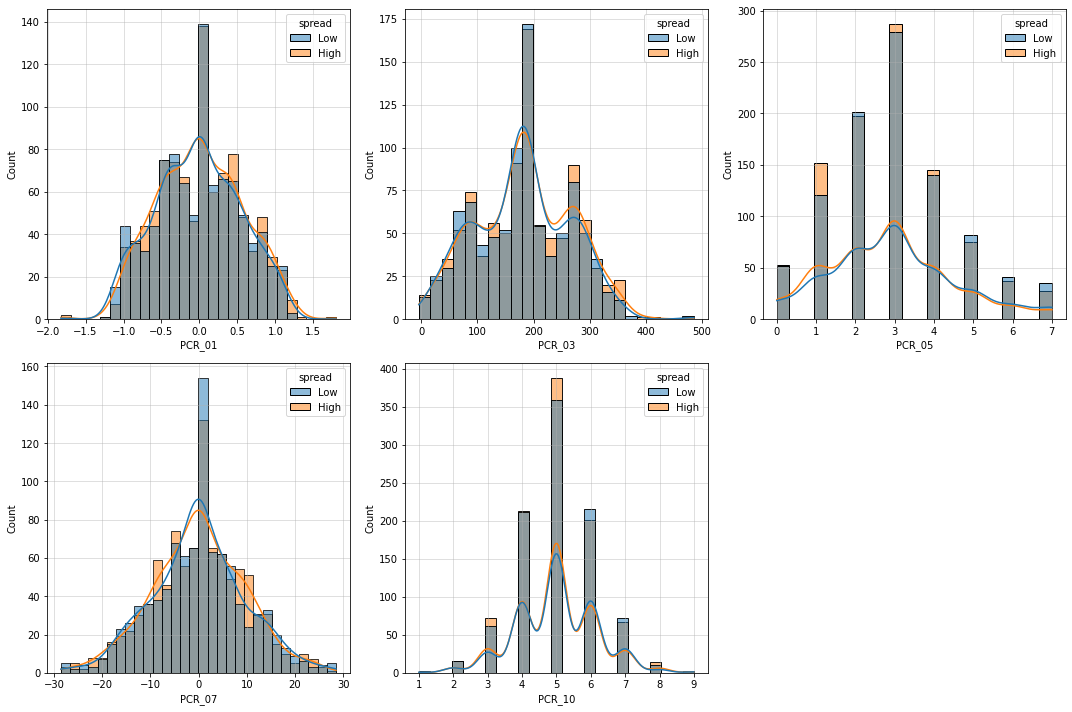

In [ ]:
COL_NAME = ['PCR_01','PCR_03','PCR_05','PCR_07','PCR_10']
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=train_df_clean, x=column, kde=True, hue=data_training_set_override.spread)
 plt.grid(alpha=0.5)
plt.tight_layout()

# How to download from Colab?

In [ ]:
from google.colab import files
outputPath = "train_major1.csv"
train_df_clean.to_csv(outputPath)
files.download(outputPath)

outputPath1 = "test_major1.csv"
test_df_clean.to_csv(outputPath1)
files.download(outputPath1) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>